Primero que nada, abrimos el dataset con pandas, para poder tener un primer pantallazo y empezar a trabajar.

In [1]:
import pandas as pd

In [2]:
GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)

FIUFIP_2021_1_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'
df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=FIUFIP_2021_1_GID))

In [3]:
df.head()

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado


Usando la herramienta de pandas profiling, podemos ver un análisis completo de los datos, útil para una primera observación.

In [4]:
# from pandas_profiling import ProfileReport
# report = ProfileReport(
#     df, title='FIUFIP datos impositivos', explorative=True, lazy=False
# )
# report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/home/sebastian/.local/lib/python3.8/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

A partir de esta primer observación, podemos plantearnos algunas preguntas entender cómo determinar si una persona es de bajos o altos ingresos: ¿cómo se relacionan los parámetros del dataset con los ingresos de las personas? ¿Hay una correlación entre los ingresos y los años estudiados? ¿Entre los ingresos y la ganancia perdida?, ¿con las horas de trabajo registradas?, ¿con la edad o rol familiar?, ¿con algún otro parámetro?

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

## ¿Hay valores invalidos en el dataset?

In [6]:
print(df.astype('str').eq('-').any(0).value_counts())
print(df.astype('str').eq('').any(0).value_counts())
(df[['edad', 'horas_trabajo_registradas']] < 0).any()

False    13
dtype: int64
False    13
dtype: int64


edad                         False
horas_trabajo_registradas    False
dtype: bool

# ¿Hay missings?

In [7]:
print((df.isnull().mean() * 100).to_frame('porcentaje nulls'))

                                            porcentaje nulls
anios_estudiados                                    0.000000
barrio                                              1.790486
categoria_de_trabajo                                5.638647
edad                                                0.000000
educacion_alcanzada                                 0.000000
estado_marital                                      0.000000
ganancia_perdida_declarada_bolsa_argentina          0.000000
genero                                              0.000000
horas_trabajo_registradas                           0.000000
religion                                            0.000000
rol_familiar_registrado                             0.000000
tiene_alto_valor_adquisitivo                        0.000000
trabajo                                             5.660146


In [34]:
df['barrio'].astype('str').value_counts() # agregar categoria sin barrio

Palermo                29170
Belgrano                 643
nan                      583
San Isidro               198
Villa Urquiza            137
Recoleta                 121
La Boca                  114
Agronomia                106
Almagro                  100
Balvanera                 95
Puerto Madero             90
Caballito                 81
Boedo                     80
Barracas                  75
Chacarita                 73
Coghland                  70
Floresta                  67
Constitucion              64
Colegiales                62
Flores                    60
Liniers                   59
Monte Castro              51
Mataderos                 44
Nueva Pompeya             43
Monserrat                 37
nuñez                     34
Parque Chacabuco          31
Parque Avellaneda         29
Villa Luro                29
Parque Chas               28
La Paternal               24
Retiro                    20
Villa Soldati             19
Villa Devoto              19
Villa Real    

## ¿Hay barrios habitados mayoritariamente por personas con alto/bajo valor adquisitivo?

<Figure size 1200x825 with 0 Axes>

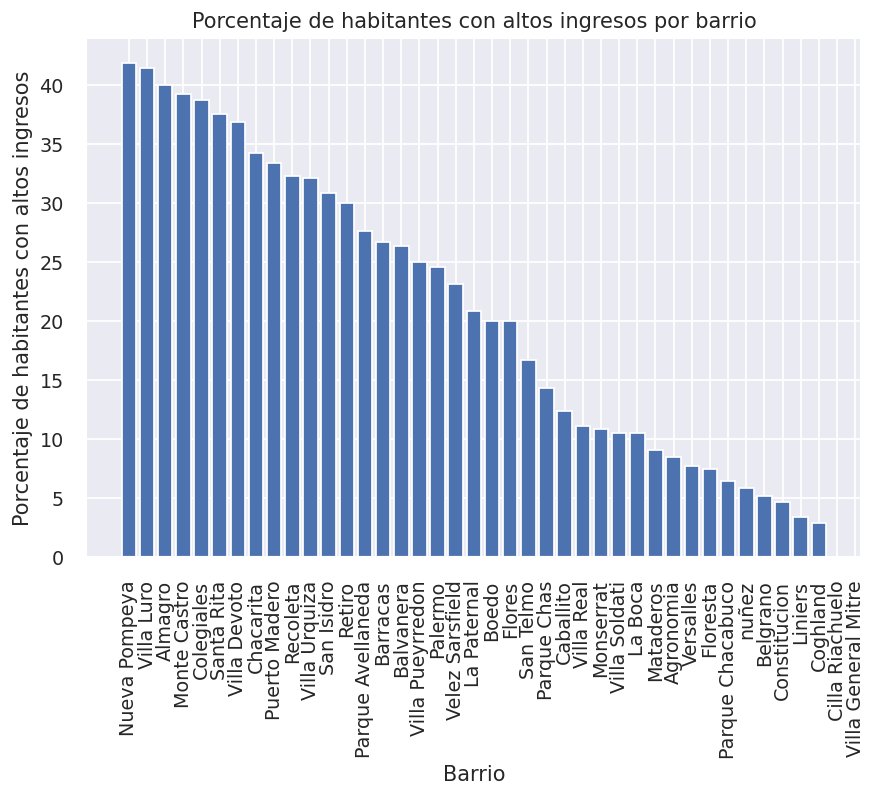

In [9]:
plt.figure(dpi=150)

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['barrio'].value_counts() / df_total['barrio'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100) # plt.bar(y, x) 
plt.ylabel("Porcentaje de habitantes con altos ingresos")
plt.xlabel("Barrio")
plt.title('Porcentaje de habitantes con altos ingresos por barrio')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x825 with 0 Axes>

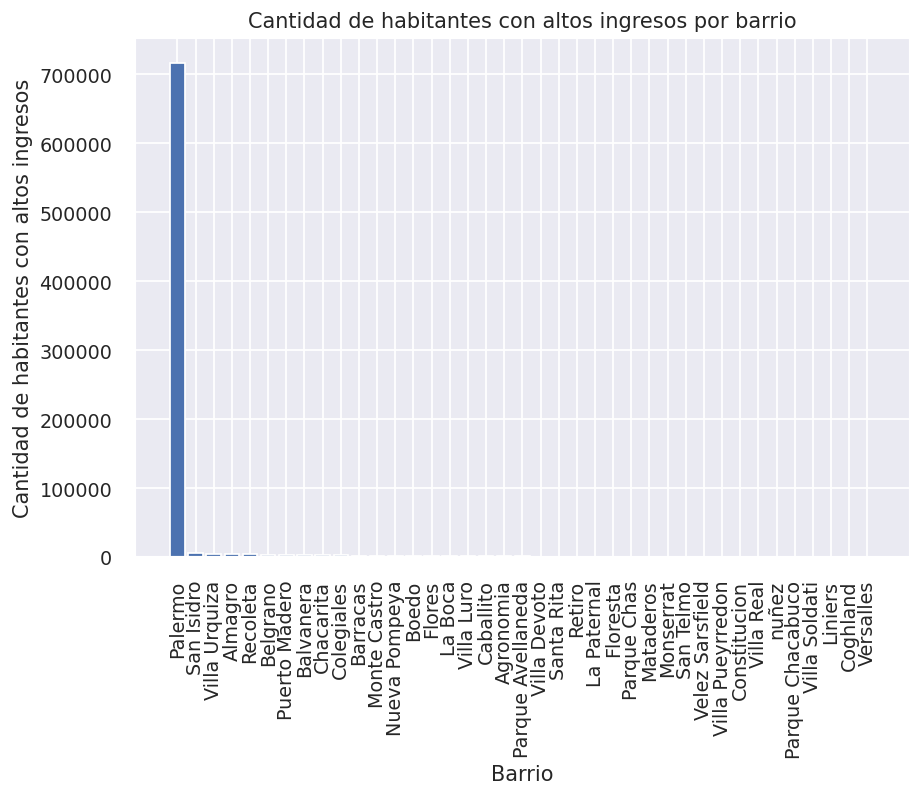

In [10]:
plt.figure(dpi=150)

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = df_filtrado['barrio'].value_counts()

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100) # plt.bar(y, x) 
plt.ylabel("Cantidad de habitantes con altos ingresos")
plt.xlabel("Barrio")
plt.title('Cantidad de habitantes con altos ingresos por barrio')
plt.xticks(rotation=90)
plt.show() 
# GRAFICO DE TORTA SOBRE PARTICIPANTES DE LA ENCUESTA Y BARRIOS?

Se observa que en existe un conjunto de barrios en los que menos del %15 de su poblacion es de altos ingresos. (¿podriamos ajustar mas ese limite con menos del %10 desde Mataderos? )

## ¿Hay categorias de trabajo correspondientes mayoritariamente a personas con bajo valor adquisitivo?

<Figure size 1200x825 with 0 Axes>

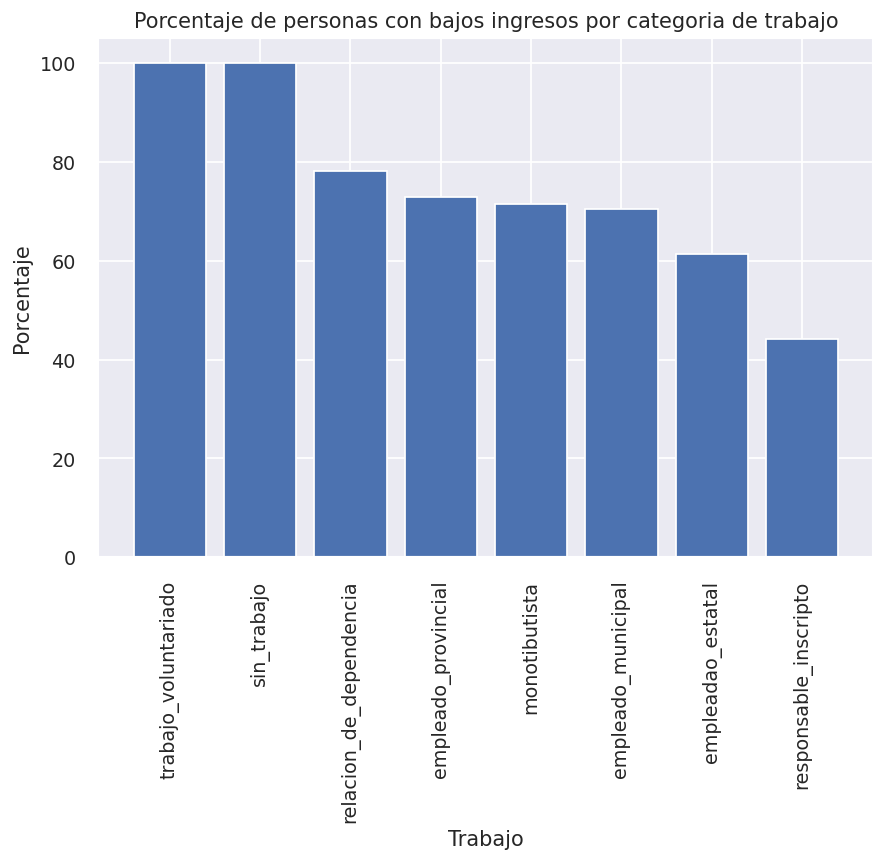

In [11]:
plt.figure(dpi=150)

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 0]

df_r = (df_filtrado['categoria_de_trabajo'].value_counts() / df_total['categoria_de_trabajo'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, ) # plt.bar(y, x) 
plt.ylabel("Porcentaje")
plt.xlabel("Trabajo")
plt.title("Porcentaje de personas con bajos ingresos por categoria de trabajo")
plt.xticks(rotation=90)
plt.show()

In [12]:
print("Porcentaje de personas con categorias desempleados o voluntariados: ")
print((df[(df['categoria_de_trabajo'] == 'sin_trabajo') | (df['categoria_de_trabajo'] == 'trabajo_voluntariado')].size ) / df.size) 

Porcentaje de personas con categorias desempleados o voluntariados: 
0.0006449433371210958


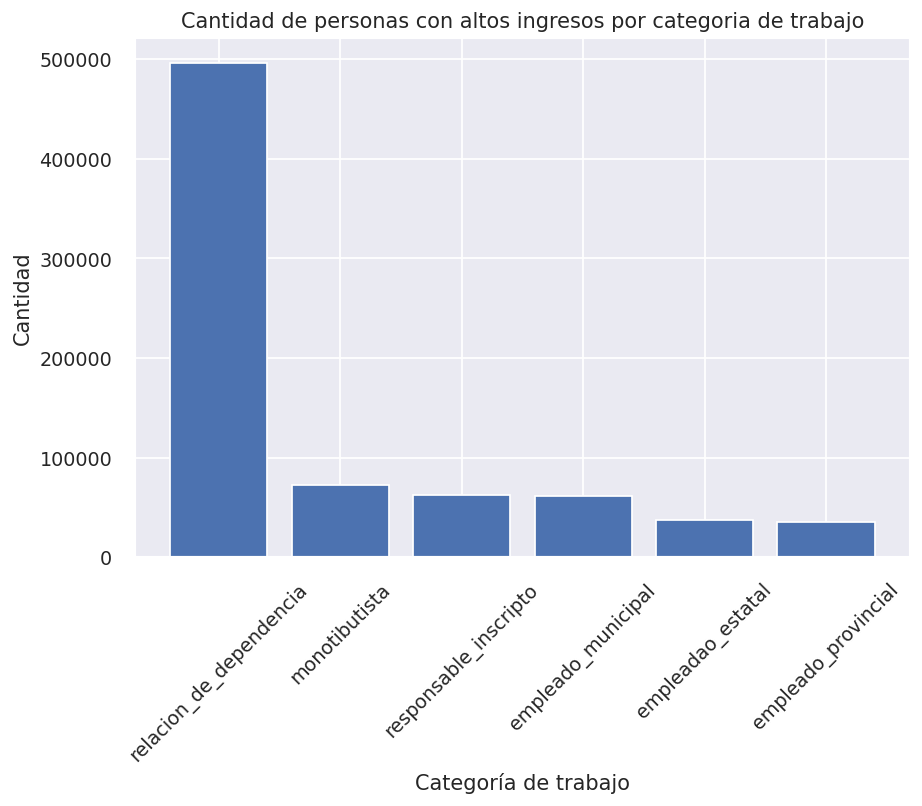

In [13]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = df_filtrado['categoria_de_trabajo'].value_counts()

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, )
plt.ylabel("Cantidad")
plt.xlabel("Categoría de trabajo")
plt.title("Cantidad de personas con altos ingresos por categoria de trabajo")
plt.xticks(rotation=45)
plt.show()

Se observa que categorias como trabajo voluntariado y desempleado son asociadas exclusivamente a personas de bajo poder adquisitivo. 

 Se observa que el porcentaje de personas con estas categorias es despreciable, no es representativo.

## ¿Cómo influye la cantidad de años estudiados?

<Figure size 1200x825 with 0 Axes>

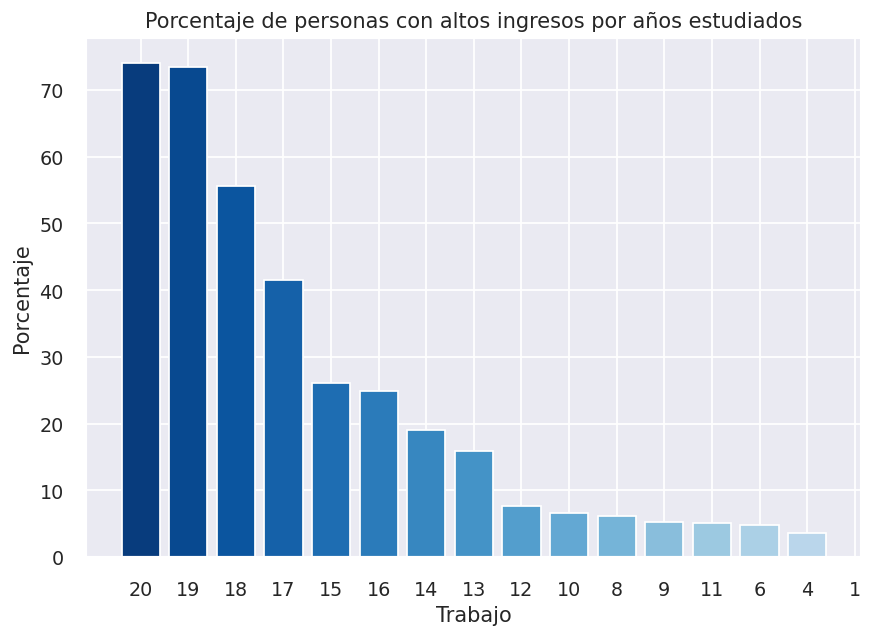

In [14]:
plt.figure(dpi=150)

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['anios_estudiados'].value_counts() / df_total['anios_estudiados'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index.map(str), df_r.values*100, color =sns.color_palette('Blues_r', 20))
plt.ylabel("Porcentaje")
plt.xlabel("Trabajo")
plt.title("Porcentaje de personas con altos ingresos por años estudiados")
plt.show()


## ¿Influye la edad en el valor adquisitivo?

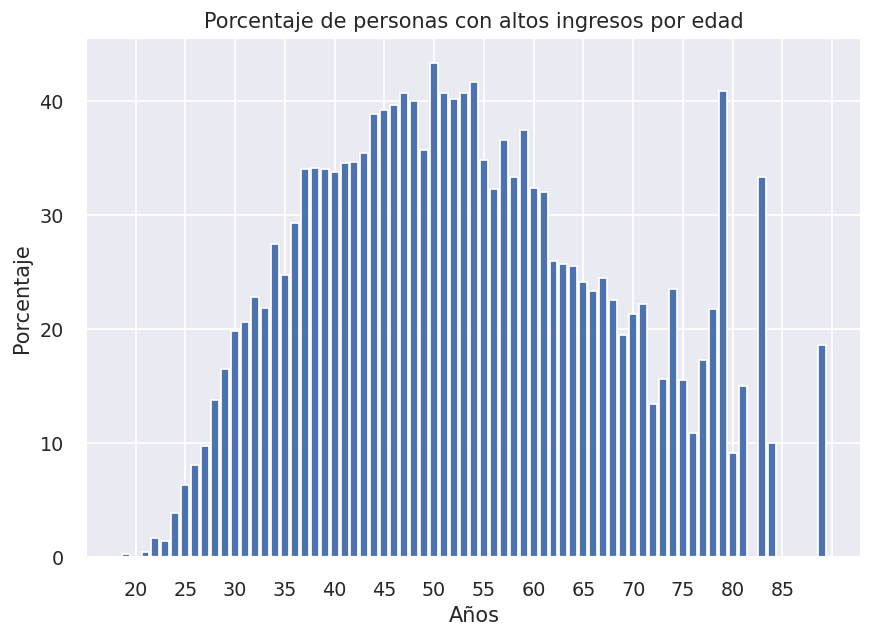

In [15]:
import numpy as np

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['edad'].value_counts() / df_total['edad'].value_counts())

plt.figure(dpi=(125))

plt.bar(df_r.index.map(str), df_r.values*100)
plt.ylabel("Porcentaje")
plt.xlabel("Años")
plt.xticks(np.arange(3, len(df_r) +1, 5.0))
plt.title("Porcentaje de personas con altos ingresos por edad")
plt.show()

## ¿Cómo se relaciona con el grado de educación alcanzada?

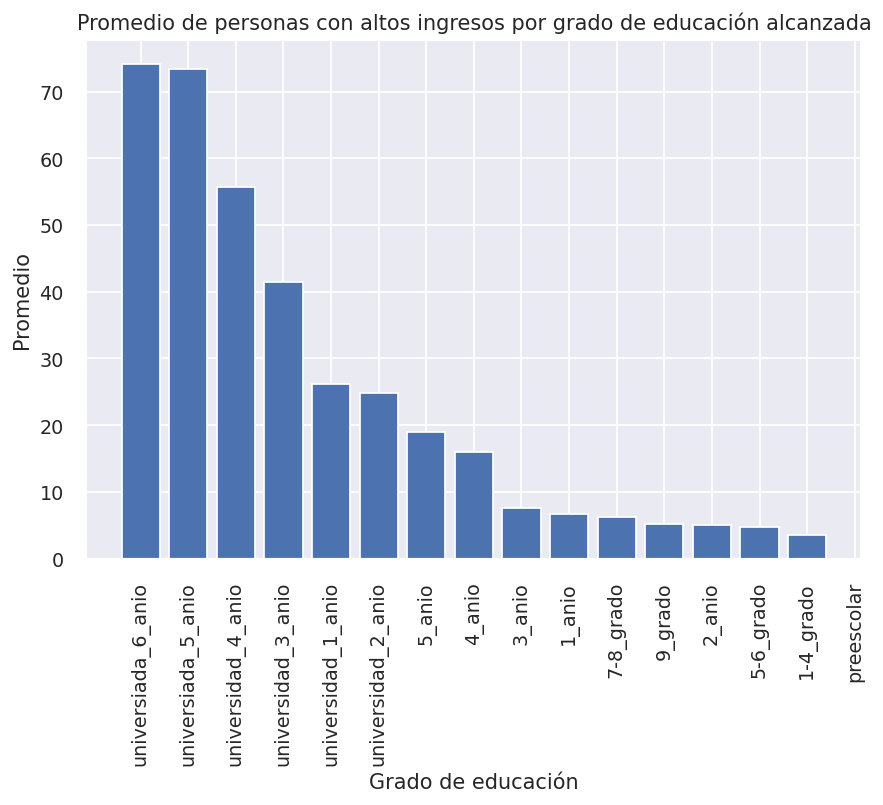

In [88]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['educacion_alcanzada'].value_counts() / df_total['educacion_alcanzada'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, )
plt.ylabel("Promedio")
plt.xlabel("Grado de educación")
plt.title("Promedio de personas con altos ingresos por grado de educación alcanzada")
plt.xticks(rotation=90)
plt.show()

In [89]:
df_filtrado['educacion_alcanzada'].value_counts()

universidad_3_anio    2221
4_anio                1675
5_anio                1387
universidad_4_anio     959
universiada_5_anio     423
universidad_1_anio     361
universiada_6_anio     306
universidad_2_anio     265
1_anio                  62
2_anio                  60
7-8_grado               40
3_anio                  33
9_grado                 27
5-6_grado               16
1-4_grado                6
Name: educacion_alcanzada, dtype: int64

## ¿Cómo se relaciona con el área de trabajo?

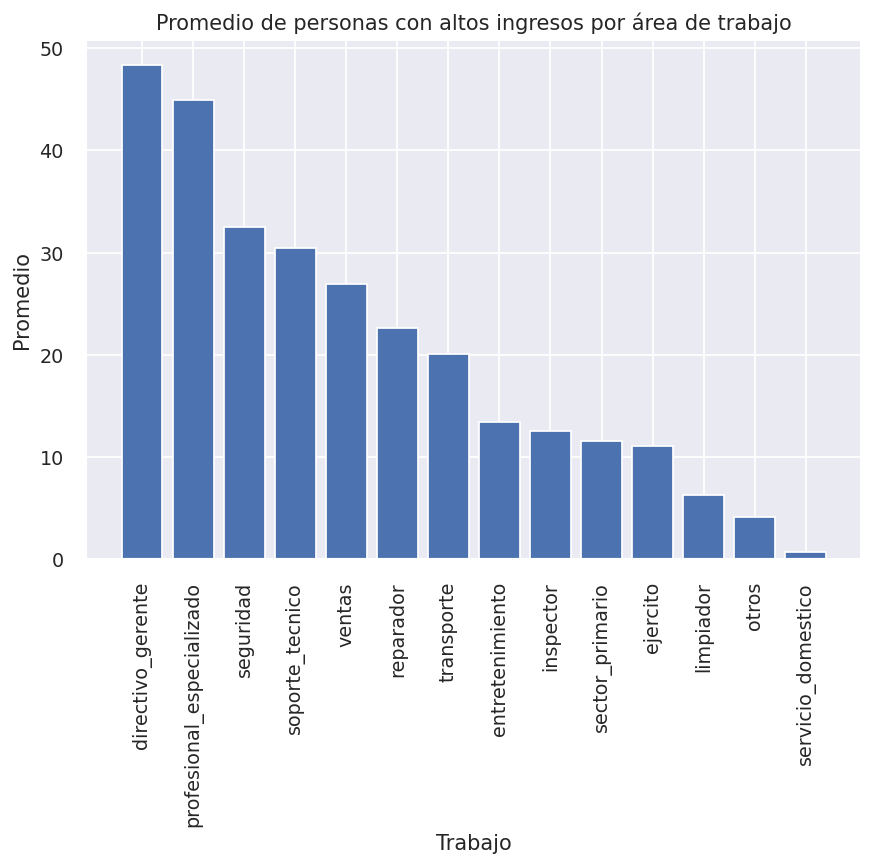

In [56]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['trabajo'].value_counts() / df_total['trabajo'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, )
plt.ylabel("Promedio")
plt.xlabel("Trabajo")
plt.title("Promedio de personas con altos ingresos por área de trabajo")
plt.xticks(rotation=90)
plt.show()

In [57]:
df['trabajo'].value_counts()

profesional_especializado    4140
reparador                    4099
directivo_gerente            4066
entretenimiento              3770
ventas                       3650
otros                        3295
inspector                    2002
transporte                   1597
limpiador                    1370
sector_primario               994
soporte_tecnico               928
seguridad                     649
servicio_domestico            149
ejercito                        9
Name: trabajo, dtype: int64

## ¿Cómo se relaciona con las horas de trabajo registradas?

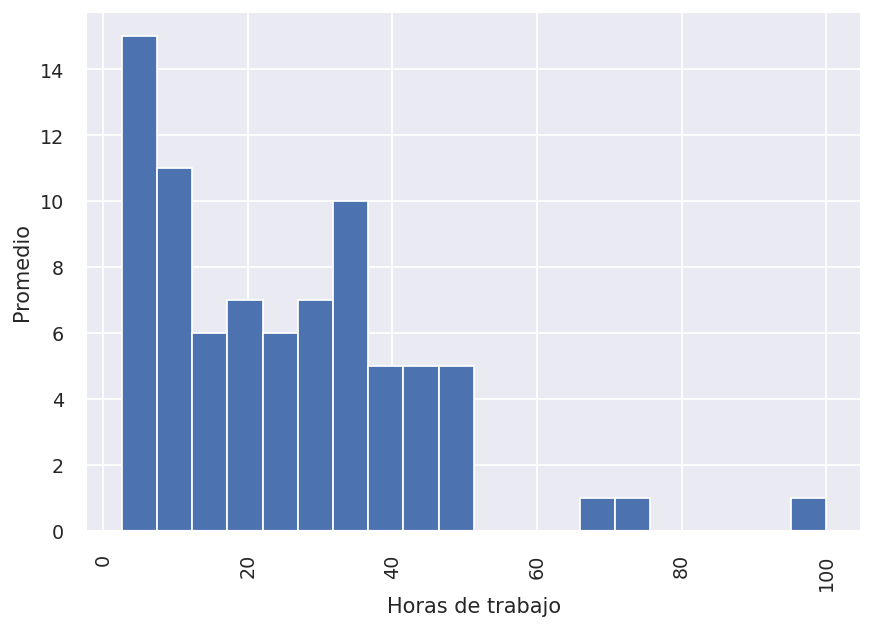

In [92]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = 100*(df_filtrado['horas_trabajo_registradas'].value_counts() / df_total['horas_trabajo_registradas'].value_counts())
# df_r = (df_filtrado['horas_trabajo_registradas'])# / df_total['horas_trabajo_registradas'])

plt.figure(dpi=(125))

plt.hist(df_r, bins=20 )
plt.ylabel("Promedio")
plt.xlabel("Horas de trabajo")
# plt.title("Promedio de personas con altos ingresos por horas de trabajo")
plt.xticks(rotation=90)
plt.show()

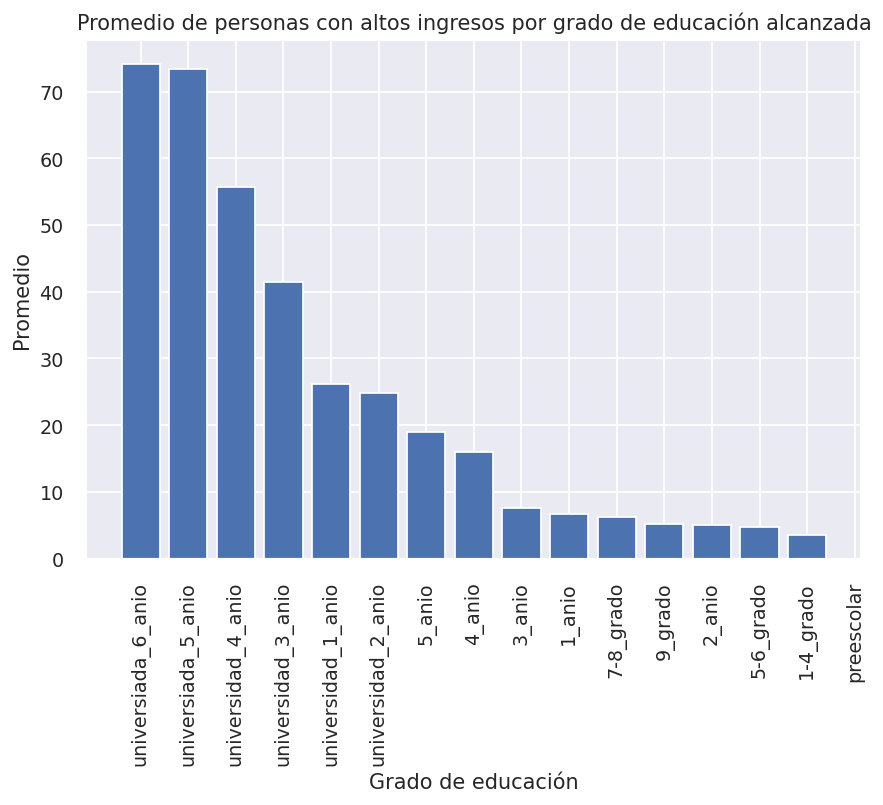

In [93]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['educacion_alcanzada'].value_counts() / df_total['educacion_alcanzada'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, )
plt.ylabel("Promedio")
plt.xlabel("Grado de educación")
plt.title("Promedio de personas con altos ingresos por grado de educación alcanzada")
plt.xticks(rotation=90)
plt.show()

In [115]:
def baseline(df):
    df = (df['anios_estudiados'] > 16) & (df['genero'] == 'hombre') & (
        (df['rol_familiar_registrado'] != 'con_hijos') & (df['rol_familiar_registrado'] != 'sin_familia')
    ) & ( (df['trabajo'] != 'limpiador') & (df['trabajo'] != 'otros') & (df['trabajo'] != 'servicio_domestico') 
    ) & ((df['estado_marital'] == 'matrimonio_civil') | (df['estado_marital'] == 'matrimonio_militar') | (df['estado_marital'] == 'divorciado') | (df['estado_marital'] == 'viudo_a')
    )    
    return list(df.astype(int))

prediccion = baseline(df)
inicial = list(df['tiene_alto_valor_adquisitivo'])

j = 0
for i in range(0,len(inicial)):
    if ((inicial[i] == prediccion[i])):
        j += 1
                
acc = 100*(j / len(inicial))
print(f'ACCURACY: {acc} %')

ACCURACY: 81.41948957341604 %


In [104]:
df['educacion_alcanzada'].value_counts()

4_anio                10501
5_anio                 7291
universidad_3_anio     5355
universidad_4_anio     1723
universidad_1_anio     1382
2_anio                 1175
universidad_2_anio     1067
1_anio                  933
7-8_grado               646
universiada_5_anio      576
9_grado                 514
3_anio                  433
universiada_6_anio      413
5-6_grado               333
1-4_grado               168
preescolar               51
Name: educacion_alcanzada, dtype: int64

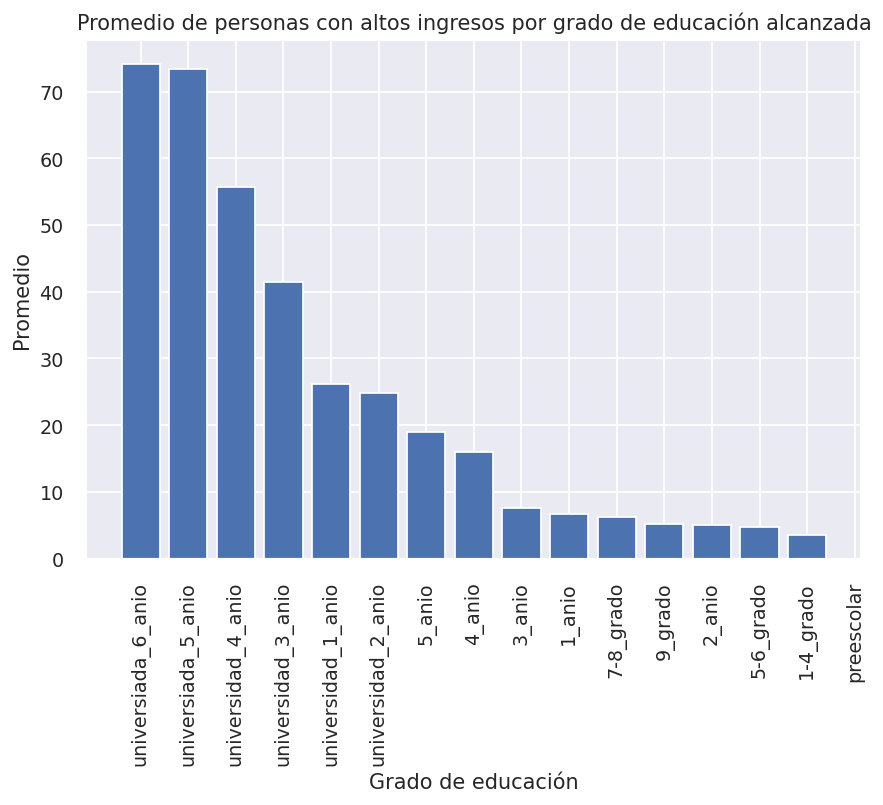

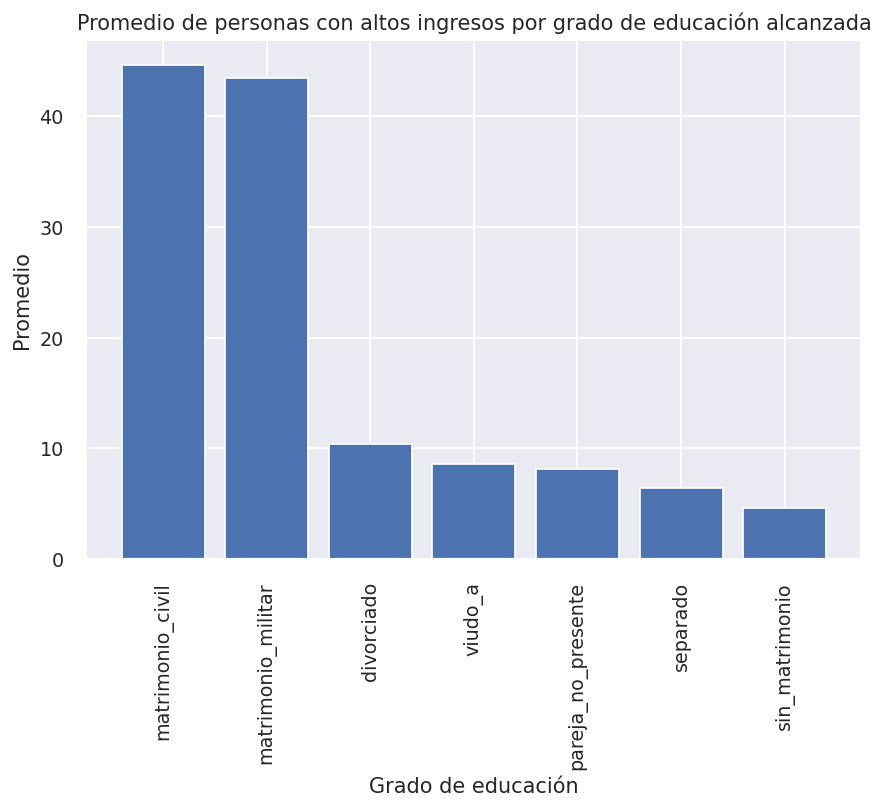

In [77]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['estado_marital'].value_counts()  / df_total['estado_marital'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, )
plt.ylabel("Promedio")
plt.xlabel("Grado de educación")
plt.title("Promedio de personas con altos ingresos por grado de educación alcanzada")
plt.xticks(rotation=90)
plt.show()

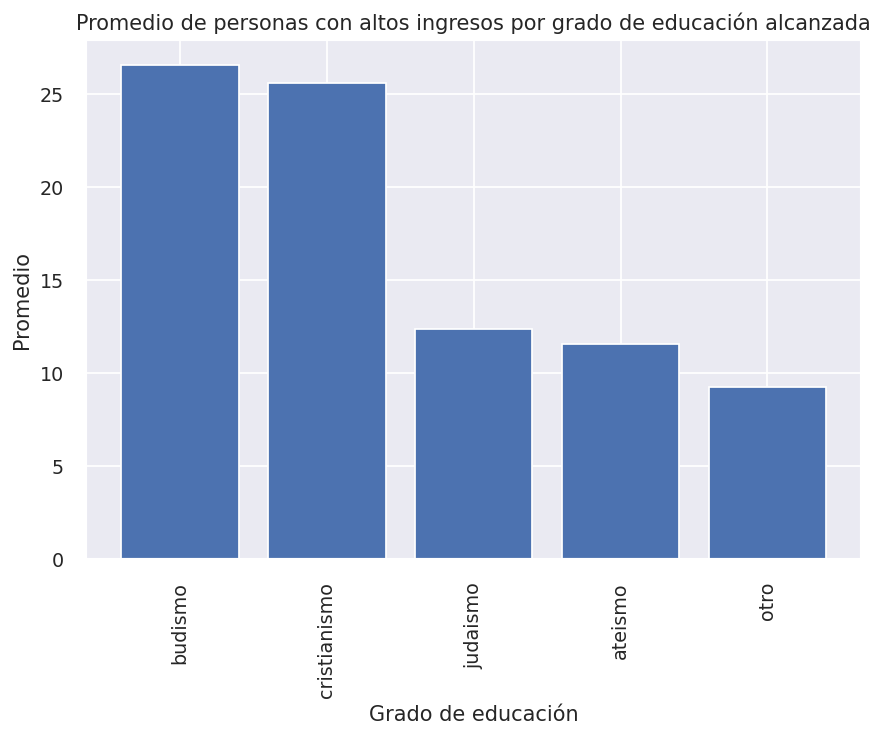

In [76]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['religion'].value_counts()  / df_total['religion'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, )
plt.ylabel("Promedio")
plt.xlabel("Grado de educación")
plt.title("Promedio de personas con altos ingresos por grado de educación alcanzada")
plt.xticks(rotation=90)
plt.show()

# se puede ver que la religion tiene baja correlacion con los ingresos

In [20]:
df.educacion_alcanzada.value_counts()

4_anio                10501
5_anio                 7291
universidad_3_anio     5355
universidad_4_anio     1723
universidad_1_anio     1382
2_anio                 1175
universidad_2_anio     1067
1_anio                  933
7-8_grado               646
universiada_5_anio      576
9_grado                 514
3_anio                  433
universiada_6_anio      413
5-6_grado               333
1-4_grado               168
preescolar               51
Name: educacion_alcanzada, dtype: int64

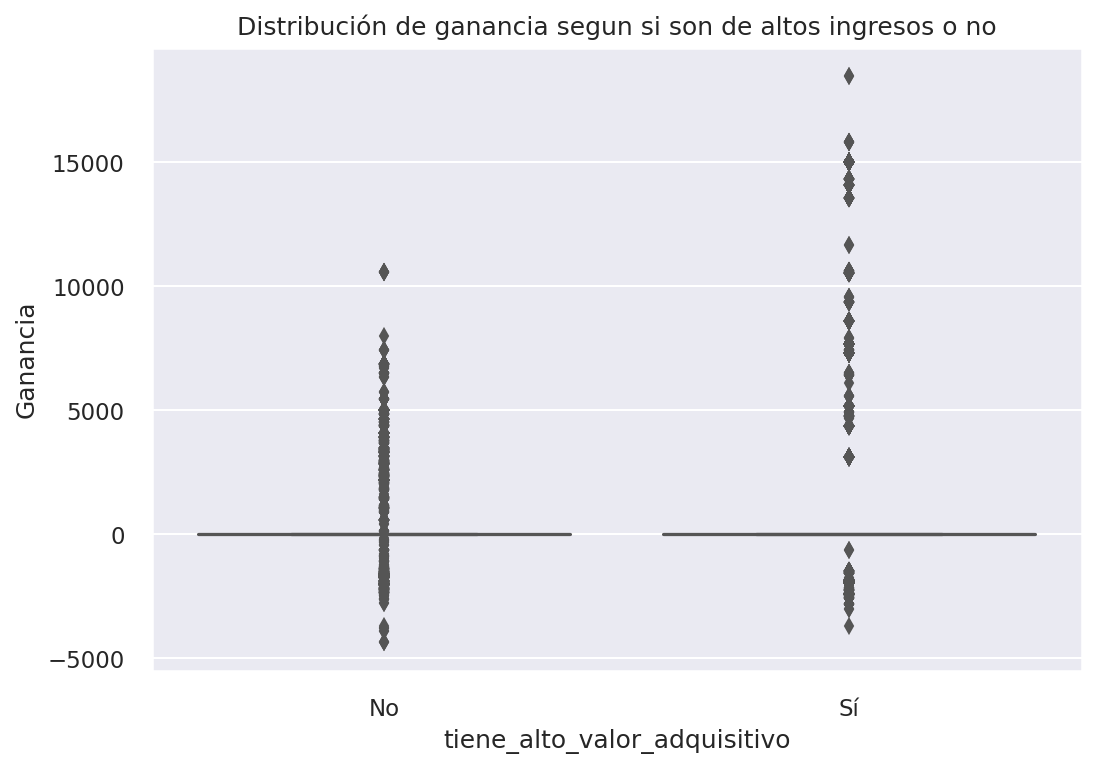

In [21]:
# se puede ver que todos los valores de ganancias estan concetrados alrededor del cero para altos y bajos ingresos
plt.figure(dpi=150)
plt.title("Distribución de ganancia segun si son de altos ingresos o no")
sns.boxplot(
    data=df[df['ganancia_perdida_declarada_bolsa_argentina'] < 20000],
    y='ganancia_perdida_declarada_bolsa_argentina',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Ganancia")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

In [22]:
# plt.figure(dpi=150)
# plt.title("Distribución de genero según si son de altos ingresos o no")
# sns.boxplot(
#     data=df[df['ganancia_perdida_declarada_bolsa_argentina'] < 20000],
#     y='ganancia_perdida_declarada_bolsa_argentina',
#     x='genero',
#     palette=['#D17049', "#89D15E"],
# )
# plt.ylabel("Ganancia")
# plt.xticks([False, True], ["No", "Sí"])
# plt.show()

In [23]:
df

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,Palermo,relacion_de_dependencia,27,universidad_2_anio,matrimonio_civil,0,mujer,38,cristianismo,casada,0,soporte_tecnico
32557,13,Palermo,relacion_de_dependencia,40,4_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,1,inspector
32558,13,Palermo,relacion_de_dependencia,58,4_anio,viudo_a,0,mujer,40,cristianismo,soltero_a,0,entretenimiento
32559,13,Palermo,relacion_de_dependencia,22,4_anio,sin_matrimonio,0,hombre,20,cristianismo,con_hijos,0,entretenimiento


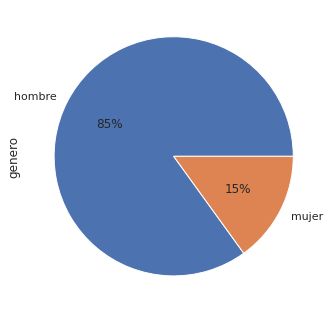

In [26]:
plt.figure()

df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]
df_filtrado['genero'].value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)
plt.show()

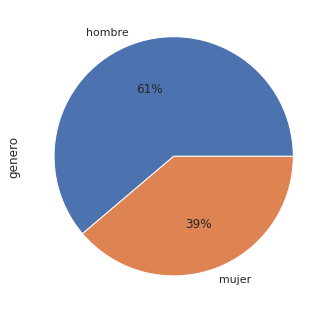

In [27]:
plt.figure()

df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 0]
df_filtrado['genero'].value_counts().plot(
    kind='pie', autopct='%1.0f%%'
)
plt.show()

# Si es mujer tiene menos chances de ser de altos ingresos

In [32]:
df.nunique()

anios_estudiados                               16
barrio                                         41
categoria_de_trabajo                            8
edad                                           73
educacion_alcanzada                            16
estado_marital                                  7
ganancia_perdida_declarada_bolsa_argentina    210
genero                                          2
horas_trabajo_registradas                      94
religion                                        5
rol_familiar_registrado                         6
tiene_alto_valor_adquisitivo                    2
trabajo                                        14
dtype: int64

In [33]:
df

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,Palermo,relacion_de_dependencia,27,universidad_2_anio,matrimonio_civil,0,mujer,38,cristianismo,casada,0,soporte_tecnico
32557,13,Palermo,relacion_de_dependencia,40,4_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,1,inspector
32558,13,Palermo,relacion_de_dependencia,58,4_anio,viudo_a,0,mujer,40,cristianismo,soltero_a,0,entretenimiento
32559,13,Palermo,relacion_de_dependencia,22,4_anio,sin_matrimonio,0,hombre,20,cristianismo,con_hijos,0,entretenimiento


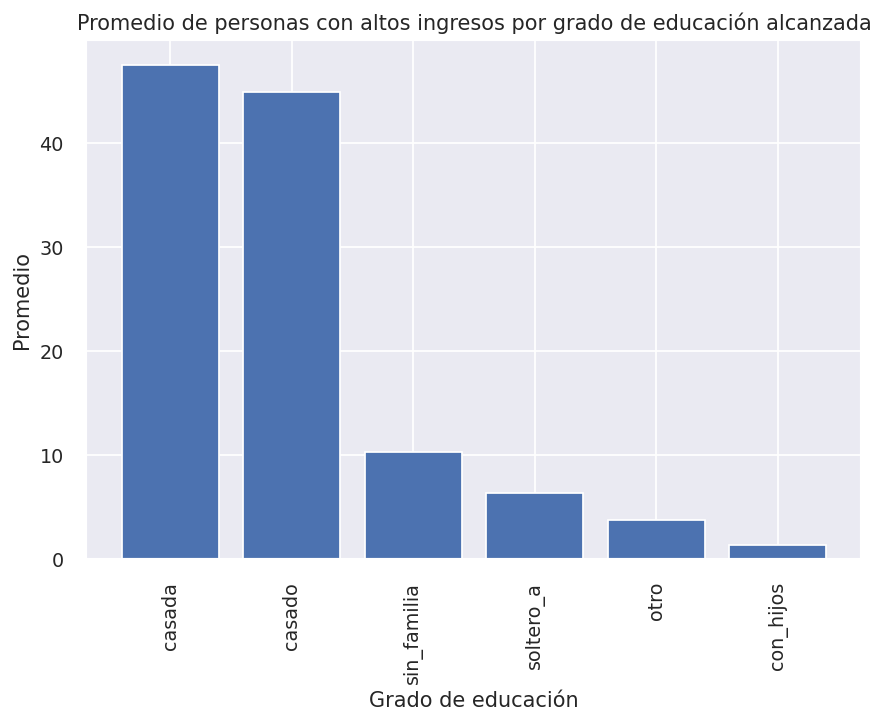

In [40]:
df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['rol_familiar_registrado'].value_counts()  / df_total['rol_familiar_registrado'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, )
plt.ylabel("Promedio")
plt.xlabel("Grado de educación")
plt.title("Promedio de personas con altos ingresos por grado de educación alcanzada")
plt.xticks(rotation=90)
plt.show()

In [41]:
df['rol_familiar_registrado'].value_counts()

casado         13193
sin_familia     8305
con_hijos       5068
soltero_a       3446
casada          1568
otro             981
Name: rol_familiar_registrado, dtype: int64